In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split,cross_validate

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.8.0


In [3]:
df = pd.read_excel('/content/Test_dataset.xlsx')
df.set_index('Date', inplace=True)
#print(df)

# df.info()
# split_time = 420

Y_colname = ['MA5_f']
# X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
# X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_colname = ['Target', 'MA5','1)철광석-중국', '4)철스크랩-터키수입가', '5)WTI', '5)BSI-해운지수', '2)중국-Flat재고', '3)중국-판재+롱재고', '4)중국-석탄내수', 
             '1)열연-미국', '1)열연-뭄바이', '1)열연-북유럽', '1)열연-한국', '1)GI-상해', '1)GI-미국']



# 예측값 : 다음주 평균가격

Dataset = df[X_colname+Y_colname]
Dataset = Dataset.dropna(axis=0)  # 데이터 없는거 지우기 (앞부분)
#print(Dataset)

#칼럼 순서 바꾸기 - 예측 값을 끝으로 보냄
# col1=Dataset.columns[0:1].to_list()
# col2=Dataset.columns[1:2].to_list()
# col3=Dataset.columns[2:].to_list()
# new_col=col1+col3+col2
# Dataset=Dataset[new_col]

print(Dataset)

#split_time = 437

            Target    MA5    1)철광석-중국  4)철스크랩-터키수입가  5)WTI  5)BSI-해운지수  \
Date                                                                     
2019-12-30   483.0  481.0   95.743000         301.0  61.68       728.0   
2019-12-31   483.0  482.0   95.944000         301.0  61.06       728.0   
2020-01-01   483.0  483.0   95.944000         301.0  61.06       728.0   
2020-01-02   485.0  483.4   96.803200         301.0  61.18       685.0   
2020-01-03   485.0  483.8   97.648000         300.0  63.05       662.0   
...            ...    ...         ...           ...    ...         ...   
2022-01-26   765.0  760.0  140.800506         470.0  87.35      1654.0   
2022-01-27   770.0  762.8  140.473823         470.0  86.61      1613.0   
2022-01-28   777.0  766.6  147.810362         473.0  86.82      1597.0   
2022-01-31   777.0  770.2  147.024137         483.0  88.15      1587.0   
2022-02-01   777.0  773.2  147.024137         484.0  88.20      1578.0   

            2)중국-Flat재고  3)중국-판재+롱재고 

In [19]:
# df.info()
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 547 entries, 2019-12-30 to 2022-02-01
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Target        547 non-null    float64
 1   MA5           547 non-null    float64
 2   1)철광석-중국      547 non-null    float64
 3   4)철스크랩-터키수입가  547 non-null    float64
 4   5)WTI         547 non-null    float64
 5   5)BSI-해운지수    547 non-null    float64
 6   2)중국-Flat재고   547 non-null    float64
 7   3)중국-판재+롱재고   547 non-null    float64
 8   4)중국-석탄내수     547 non-null    float64
 9   1)열연-미국       547 non-null    float64
 10  1)열연-뭄바이      547 non-null    float64
 11  1)열연-북유럽      547 non-null    float64
 12  1)열연-한국       547 non-null    float64
 13  1)GI-상해       547 non-null    float64
 14  1)GI-미국       547 non-null    float64
 15  MA5_f         547 non-null    float64
dtypes: float64(16)
memory usage: 72.6 KB


In [20]:
pd.options.display.float_format = '{:,.2f}'.format
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,547.00,664.05,193.59,397.00,486.50,654.00,882.00,"1,022.00"
MA5,547.00,662.97,193.67,397.00,485.70,653.00,882.40,"1,018.20"
1)철광석-중국,547.00,143.61,42.77,85.63,108.91,133.58,174.56,260.33
4)철스크랩-터키수입가,547.00,378.83,97.37,207.00,280.00,420.00,469.62,515.75
5)WTI,547.00,54.97,17.98,-37.63,40.97,57.76,69.56,88.20
5)BSI-해운지수,547.00,"1,592.16",974.92,383.00,764.00,"1,080.00","2,374.00","3,624.00"
2)중국-Flat재고,547.00,501.36,69.25,371.40,464.65,492.30,533.40,715.30
3)중국-판재+롱재고,547.00,"1,471.26",428.37,795.50,"1,154.90","1,476.20","1,619.10","2,598.60"
4)중국-석탄내수,547.00,"2,401.00",660.95,"1,656.40","1,878.30","2,171.40","2,744.30","4,090.50"
1)열연-미국,547.00,"1,198.14",599.10,480.61,626.11,"1,150.81","1,811.10","2,158.33"


In [32]:
grid_ndf = sns.pairplot(Dataset)
plt.show()
plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
ndf = Dataset[:]
# ndf.head()

In [5]:
#X, Y 데이터 구분 - 데이터 슬라이싱
x_data = Dataset.iloc[:, :-1]
y_data = Dataset.iloc[:, -1]

x_data.head(5)
y_data.head(5)

Date
2019-12-30    484.2
2019-12-31    485.2
2020-01-01    486.2
2020-01-02    487.2
2020-01-03    488.2
Name: MA5_f, dtype: float64

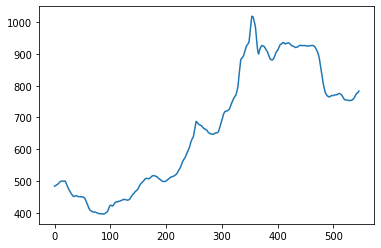

(547,)


 - train data 개수:  437
 - test data 개수:  110


In [7]:
# data type 전환 - np_array
x_np = np.array(x_data)
y_np = np.array(y_data)


#%matplotlib notebook
plt.plot(y_np)    # 다음주 평균 가격
plt.show()
print(y_np.shape)

#Dataset 구분 : Train 비율 80%, Test 비율 20%
trainSize = int(len(ndf)*0.8)
x_train = x_np[0:trainSize]
x_test = x_np[trainSize:]

y_train = y_np[0:trainSize]
y_test = y_np[trainSize:]


print('\n')
print(' - train data 개수: ', len(x_train))
print(' - test data 개수: ', len(x_test))



In [9]:
# print(x_test)
print(Dataset[trainSize:])

            Target    MA5    1)철광석-중국  4)철스크랩-터키수입가  5)WTI  5)BSI-해운지수  \
Date                                                                     
2021-09-01   919.0  920.2  160.474149        447.00  68.59      3434.0   
2021-09-02   919.0  920.0  160.479116        445.00  69.99      3434.0   
2021-09-03   923.0  920.6  160.104052        445.25  69.29      3348.0   
2021-09-06   924.0  921.2  154.823712        445.00  69.29      3293.0   
2021-09-07   924.0  921.8  155.535933        443.50  68.35      3256.0   
...            ...    ...         ...           ...    ...         ...   
2022-01-26   765.0  760.0  140.800506        470.00  87.35      1654.0   
2022-01-27   770.0  762.8  140.473823        470.00  86.61      1613.0   
2022-01-28   777.0  766.6  147.810362        473.00  86.82      1597.0   
2022-01-31   777.0  770.2  147.024137        483.00  88.15      1587.0   
2022-02-01   777.0  773.2  147.024137        484.00  88.20      1578.0   

            2)중국-Flat재고  3)중국-판재+롱재고 

In [45]:
#선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

#단순회귀분석 모형 객체 생성
lr = LinearRegression()

lr.fit(x_train, y_train)

#학습 모형에 test data 적용하여 결정계수 계산 (r-square)
r_square = lr.score(x_test, y_test)
print("r_square :", r_square)



r_square : 0.8663468033007166



2) Test data - 정확성 체크


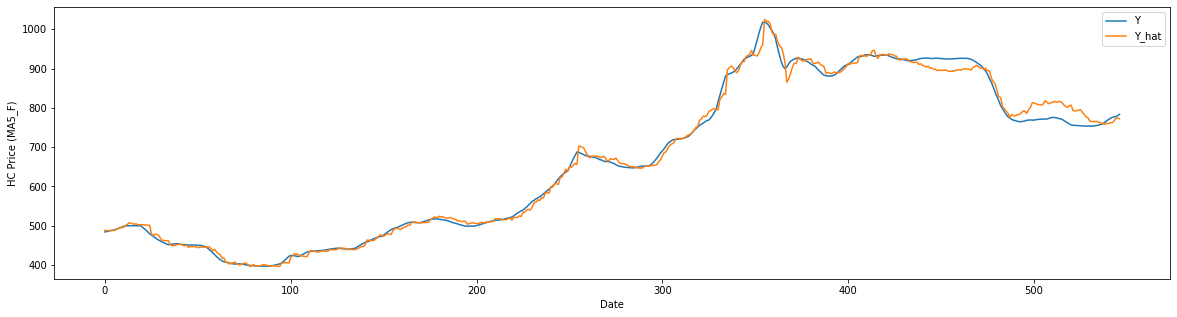

In [76]:
y_predict_tr = lr.predict(x_train)
y_predict_te = lr.predict(x_test)

test_actual = np.concatenate((y_train, y_test), axis=0)
test_predict = np.concatenate((y_predict_tr, y_predict_te), axis=0)

plt.figure(figsize = (20,5))

# ax1 = sns.distplot(test_actual, hist=False, label="Y")
# ax2 = sns.distplot(test_predict, hist=False, label="Y_hat")


print("\n2) Test data - 정확성 체크")

plt.plot(test_actual)     # 실제 가격
plt.plot(test_predict)     # 예측 가격

plt.xlabel('Date')
plt.ylabel('HC Price (MA5_F)')
plt.legend(labels=["Y", "Y_hat"], loc = 'best')
plt.show()

In [77]:
print("< 다항회귀분석 결과 - 1주후 평균가격 >\n")


# Train 값에 대한 metrics 측정
MAE = abs(y_train - y_predict_tr).mean()
MSE = ((y_train - y_predict_tr)**2).mean()
MAPE = (abs(y_train - y_predict_tr)/y_train*100).mean()

print("\n1) Train data - 정확성 체크")
display(pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T)
r_square = lr.score(x_train, y_train)
print(" * r_square :", '%0.2f' % r_square)


# Test 값에 대한 metrics 측정
MAE = abs(y_test - y_predict_te).mean()
MSE = ((y_test - y_predict_te)**2).mean()
MAPE = (abs(y_test - y_predict_te)/y_test*100).mean()

print("\n\n2) Test data - 정확성 체크")
display(pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T)
r_square = lr.score(x_test, y_test)
print(" * r_square :", '%0.2f' % r_square)

< 다항회귀분석 결과 >


1) Train data - 정확성 체크


,MAE,MSE,MAPE
Score,6.81,106.03,1.06


 * r_square : 1.00


2) Test data - 정확성 체크


,MAE,MSE,MAPE
Score,23.39,716.06,2.87


 * r_square : 0.87
